### 例1.身高与体重的一元线性回归

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']

In [27]:
columns=['身高', '体重', '胖瘦']
hw = pd.read_csv('身高体重.txt', sep=" ", names=columns)
hw

,身高,体重,胖瘦
0,1.5,50,thin
1,1.5,60,fat
2,1.6,40,thin
3,1.6,60,fat
4,1.7,60,thin
5,1.7,80,fat
6,1.8,60,thin
7,1.8,90,fat
8,1.9,70,thin
9,1.9,80,fat


In [31]:
height = np.array(hw['身高'])
height

array([1.5, 1.5, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.9, 1.9])

In [33]:
weight = np.array(hw['体重'])
weight

array([50, 60, 40, 60, 60, 80, 60, 90, 70, 80], dtype=int64)

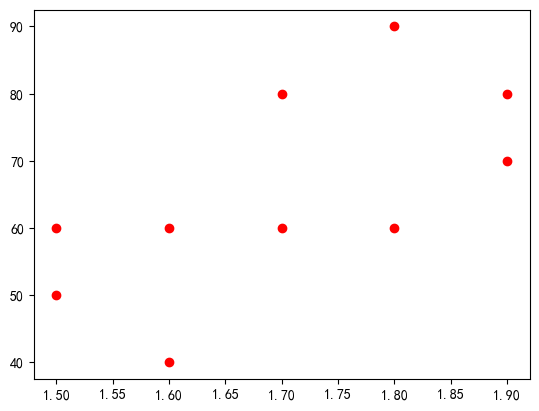

In [41]:
plt.scatter(height, weight, color='r')
plt.show()

In [99]:
X = np.array([1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]).reshape(-1, 1)
X_test = np.array([1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97]).reshape(-1, 1)
X

array([[1.5 ],
       [1.55],
       [1.6 ],
       [1.65],
       [1.7 ],
       [1.75],
       [1.8 ],
       [1.85],
       [1.9 ],
       [1.95]])

In [93]:
y = np.array([50., 52., 58., 60., 65., 68., 72., 78., 85., 90.])
y_test = np.array([51, 53, 57, 61, 66, 69, 73, 79, 84, 89])
y

array([50., 52., 58., 60., 65., 68., 72., 78., 85., 90.])

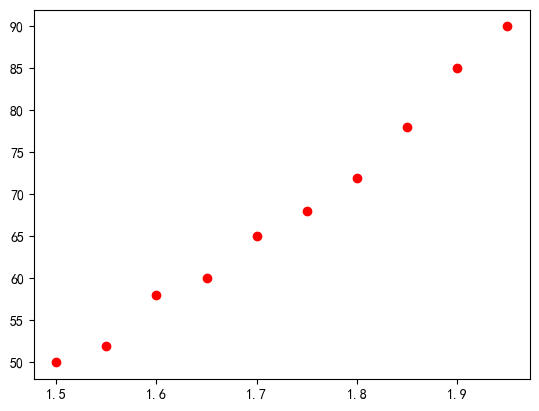

In [49]:
plt.scatter(X, y, color='r')
plt.show()

在模型训练前要进行维度转化，np.array([1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]) 创建的是一个一维数组，形状是 (10,)，表示有 10 个样本，每个样本有一个值。   



.reshape(-1, 1) 将这个一维数组调整为二维数组，形状变为 (10, 1)，表示有 10 个样本，每个样本仍然只有一个特征，但这符合机器学习模型的输入要求，因为模型需要二维的特征矩阵。

使用 2 个数据点时的斜率（系数）: [40.], 截距为：[-10.], 线性方程为：y = [40.] * x + [-10.]
使用 3 个数据点时的斜率（系数）: [80.], 截距为：[-70.66666667], 线性方程为：y = [80.] * x + [-70.66666667]
使用 4 个数据点时的斜率（系数）: [72.], 截距为：[-58.4], 线性方程为：y = [72.] * x + [-58.4]
使用 5 个数据点时的斜率（系数）: [76.], 截距为：[-64.6], 线性方程为：y = [76.] * x + [-64.6]
使用 6 个数据点时的斜率（系数）: [74.85714286], 截距为：[-62.80952381], 线性方程为：y = [74.85714286] * x + [-62.80952381]
使用 7 个数据点时的斜率（系数）: [75.], 截距为：[-63.03571429], 线性方程为：y = [75.] * x + [-63.03571429]
使用 8 个数据点时的斜率（系数）: [78.80952381], 截距为：[-69.13095238], 线性方程为：y = [78.80952381] * x + [-69.13095238]
使用 9 个数据点时的斜率（系数）: [84.66666667], 截距为：[-78.6], 线性方程为：y = [84.66666667] * x + [-78.6]
使用 10 个数据点时的斜率（系数）: [88.48484848], 截距为：[-84.83636364], 线性方程为：y = [88.48484848] * x + [-84.83636364]


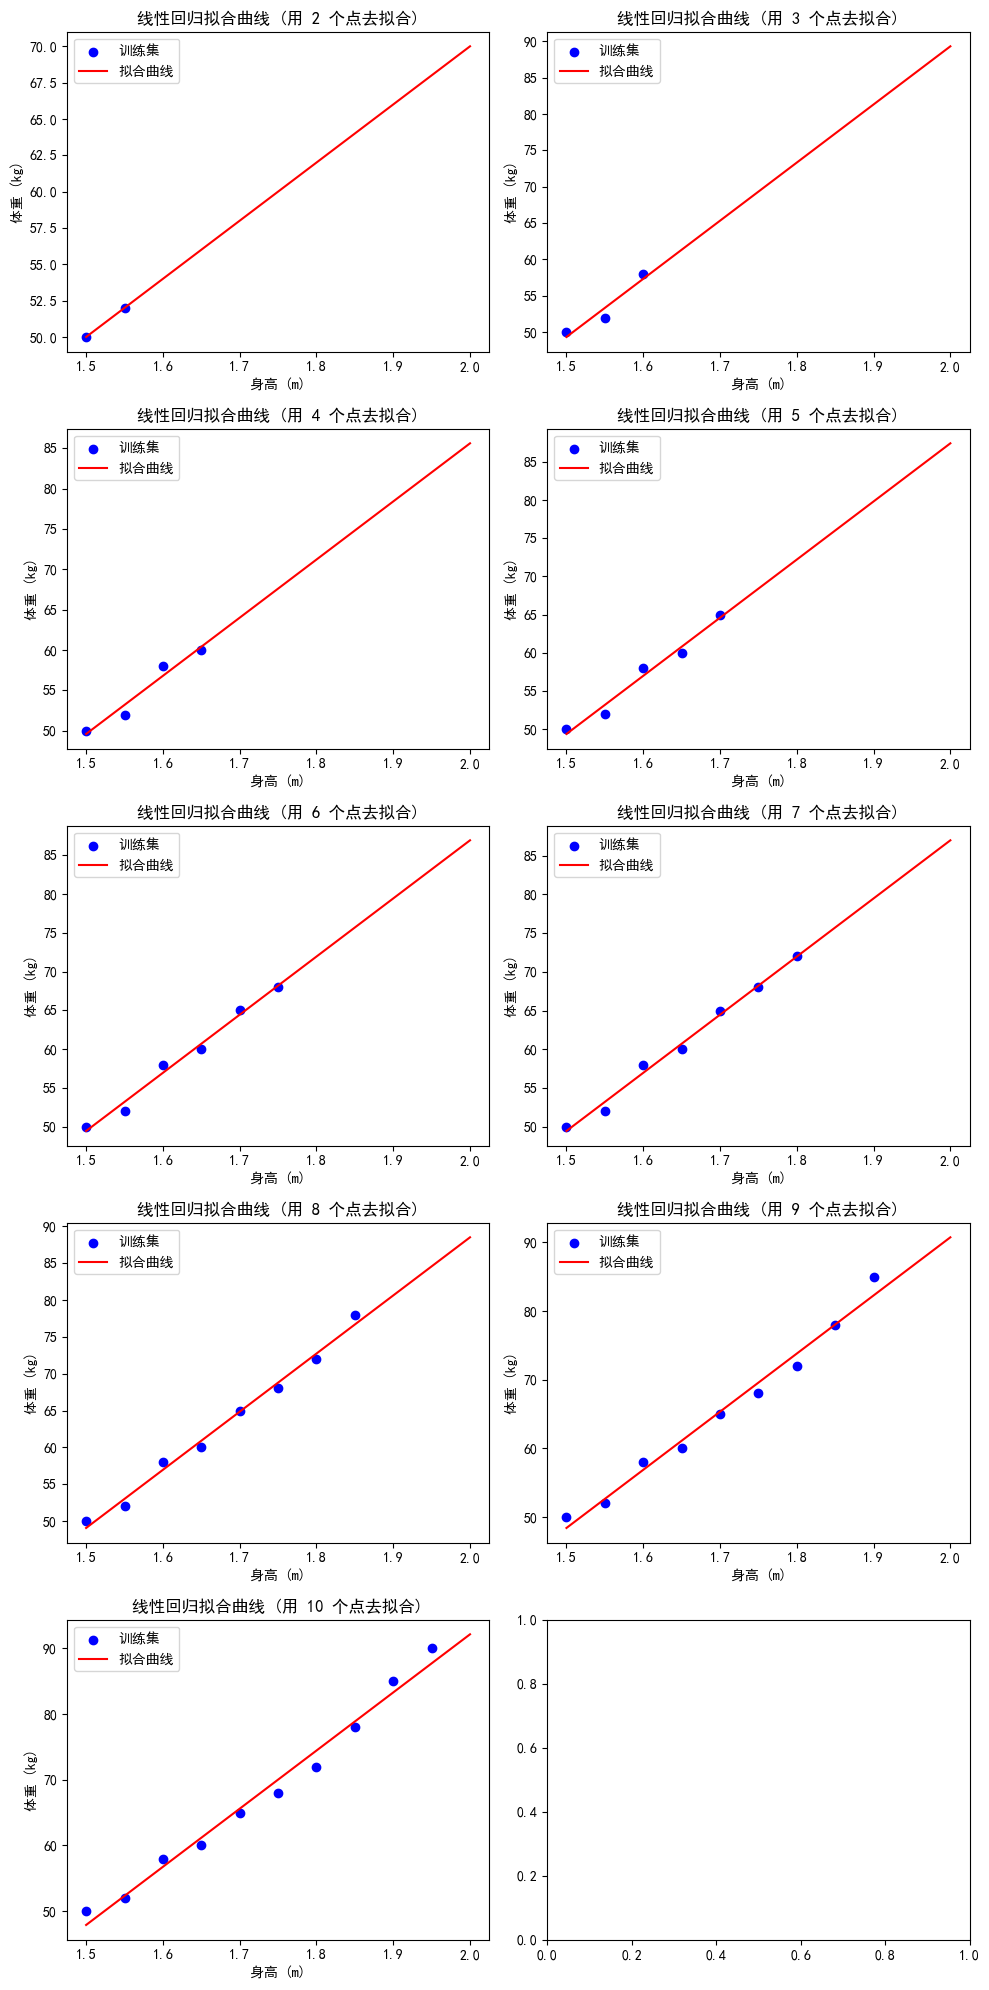

In [147]:
# 回归
from sklearn.linear_model import LinearRegression
import numpy as np

# 线性回归模型
model = LinearRegression()

X = np.array([1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]).reshape(-1, 1)
X_test = np.array([1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97]).reshape(-1, 1)
X

y = np.array([50., 52., 58., 60., 65., 68., 72., 78., 85., 90.]).reshape(-1, 1)
y_test = np.array([51, 53, 57, 61, 66, 69, 73, 79, 84, 89]).reshape(-1, 1)
y

# 输出到一个图表
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

# 扁平化图像
axes = axes.flatten()

# 详细输出每一次拟合的情况
for i in range(2, len(X) + 1):
    # 每次使用前 i 个数据点进行训练
    x_train = X[:i]
    y_train = y[:i]

    # 训练模型
    model.fit(x_train, y_train)

    # 生成拟合曲线的x轴的数据
    X_plot = np.linspace(1.5, 2.0, 100).reshape(-1, 1)
    
    # 使用训练好的模型生成预测值
    y_plot = model.predict(X_plot)

    # 获取斜率（w，b系数）
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"使用 {i} 个数据点时的斜率（系数）: {slope}, 截距为：{intercept}, 线性方程为：y = {slope} * x + {intercept}")
    
    

    # 定位子图
    ax = axes[i - 2]

    # 绘制训练数据点
    ax.scatter(x_train, y_train, color='b', label='训练集')

    # 绘制拟合曲线
    ax.plot(X_plot, y_plot, color='r', label='拟合曲线')

    # 标题标签
    ax.set_title(f'线性回归拟合曲线 (用 {i} 个点去拟合)')
    ax.set_xlabel('身高 (m)')
    ax.set_ylabel('体重 (kg)')
    
    ax.legend()

# 调整子图距离
plt.tight_layout()

plt.show()



In [153]:
# 训练后的模型与真实值的差距
X_test = np.array([1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97]).reshape(-1, 1)
X

y_test = np.array([51, 53, 57, 61, 66, 69, 73, 79, 84, 89]).reshape(-1, 1)
y

y2 = model.predict(X_test)

# 绘制训练集
plt.plot(X, y, 'ob')

# 测试数据集
plt.plot(X_test, y_test, 'g-')

# 



array([[49.66060606],
       [54.08484848],
       [58.50909091],
       [62.93333333],
       [67.35757576],
       [71.78181818],
       [76.20606061],
       [80.63030303],
       [85.05454545],
       [89.47878788]])

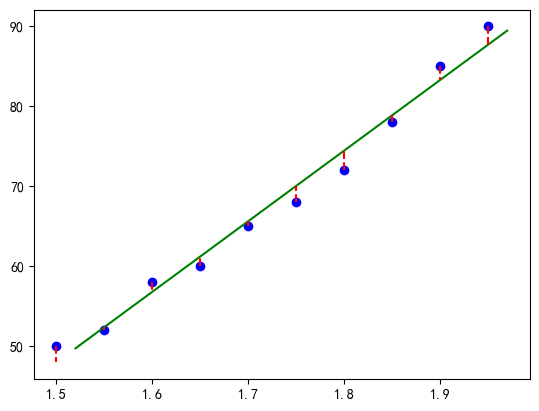

系数R^2=0.98


In [155]:
X_test = np.array([1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97]).reshape(-1, 1)
X

y_test = np.array([51, 53, 57, 61, 66, 69, 73, 79, 84, 89]).reshape(-1, 1)
y

y2 = model.predict(X_test)

plt.plot(X, y, 'ob')

plt.plot(X_test, y2, 'g-')

yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r--')

plt.show()

r2 = model.score(X_test, y_test)
print("系数R^2=%.2f" % r2)

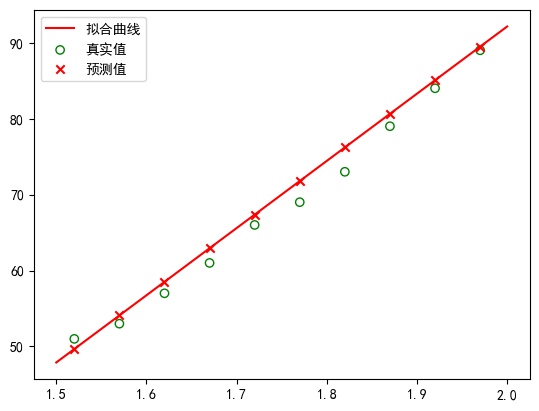

In [159]:
# 回归
from sklearn.linear_model import LinearRegression
import numpy as np

# 线性回归模型
model = LinearRegression()

X = np.array([1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]).reshape(-1, 1)
X_test = np.array([1.52, 1.57, 1.62, 1.67, 1.72, 1.77, 1.82, 1.87, 1.92, 1.97]).reshape(-1, 1)
X

y = np.array([50., 52., 58., 60., 65., 68., 72., 78., 85., 90.]).reshape(-1, 1)
y_test = np.array([51, 53, 57, 61, 66, 69, 73, 79, 84, 89]).reshape(-1, 1)
y

model.fit(X, y)

# 绘制拟合曲线
x_plot = np.linspace(1.5, 2.0, 100).reshape(-1, 1)
y_plot = model.predict(x_plot)
plt.plot(x_plot, y_plot, color='r', label='拟合曲线')

y_pre = model.predict(X_test)

plt.scatter(X_test, y_test, facecolors='none', edgecolors='green', label='真实值')
plt.scatter(X_test, y_pre, color='r', marker='x', label='预测值')

plt.legend()

plt.show()

In [161]:
r2 = model.score(X_test, y_test)
print("系数R^2=%.2f" % r2)

系数R^2=0.98


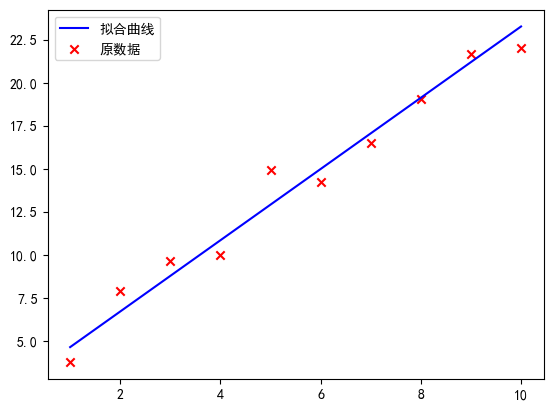

Final w: 2.026482136824285, b: 2.770266585753472


In [210]:
# 用自己写的梯度下降法去预测：
# 误差函数
from copy import deepcopy
import math

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0  # 初始化成本变量

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i]) ** 2
    total_cost = 1 / (2 * m) * cost

    return total_cost

# 计算梯度
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] +b
        # 对w的梯度
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    # 平均梯度
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

# 梯度下降
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        #if i % math.ceil(num_iters / 10) == 0:
            #print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  #f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  #f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history


x = np.linspace(1, 10, 10)

y = 2 * x + 3 + np.random.normal(0, 1, x.shape)

# 初始参数
w_in = 0  # 初始权重
b_in = 0  # 初始偏置
alpha = 0.01  # 学习率
num_iters = 1000  # 迭代次数

x_plot = np.linspace(1, 10, 100)
y_plot = w_final * x_plot + b_final
plt.plot(x_plot, y_plot, color='b', label='拟合曲线')

plt.scatter(x, y, color='r', marker='x', label='原数据')

plt.legend()

plt.show()

w_final, b_final, J_hist, p_hist = gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)
print(f"Final w: {w_final}, b: {b_final}")

**身高体重数值差距过大，需要先进行特征缩放，可以使用 标准化 对输入的特征进行缩放。你可以尝试使用 StandardScaler 来对数据进行标准化，使其均值为 0，方差为 1。**

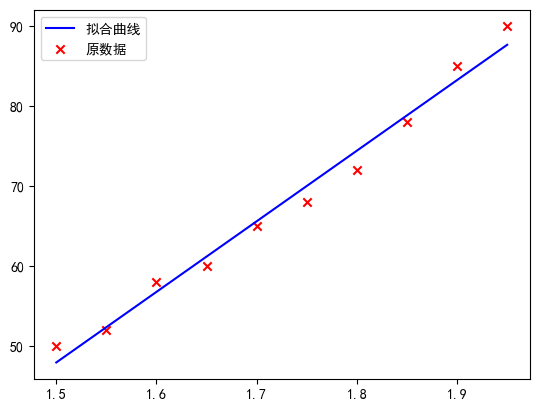

Final w: [12.70712028], b: [67.79707299]


In [215]:
from sklearn.preprocessing import StandardScaler

# 定义身高体重数据
x = np.array([1.50, 1.55, 1.60, 1.65, 1.70, 1.75, 1.80, 1.85, 1.90, 1.95]).reshape(-1, 1)
y = np.array([50, 52, 58, 60, 65, 68, 72, 78, 85, 90])

# 使用StandardScaler进行特征缩放
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)  # 对输入x进行标准化

# 初始参数
w_in = 0  # 初始权重
b_in = 0  # 初始偏置
alpha = 0.01  # 调整后的学习率
num_iters = 1000  # 迭代次数

# 执行梯度下降
w_final, b_final, J_hist, p_hist = gradient_descent(x_scaled, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient)

# 绘制拟合曲线和原数据
x_plot = np.linspace(min(x), max(x), 100).reshape(-1, 1)
x_plot_scaled = scaler.transform(x_plot)  # 将绘图的x数据也进行标准化
y_plot = w_final * x_plot_scaled + b_final  # 预测值

plt.plot(x_plot, y_plot, color='b', label='拟合曲线')
plt.scatter(x, y, color='r', marker='x', label='原数据')
plt.legend()
plt.show()

print(f"Final w: {w_final}, b: {b_final}")